# Exploratory Data Analysis-Retail (Task-3)


## By- M.V.S.Sai Hiranmayee



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'Downloads/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df2=df.copy()
df2.drop('Country',axis='columns',inplace=True)
df2.drop('Postal Code',axis='columns',inplace=True)
df2.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
pd.crosstab(index=df2['Category'],columns='count')

col_0,count
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


In [5]:
pd.crosstab(index=df2['Segment'],columns='count')

col_0,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [9]:
numerical_data=df2.select_dtypes(exclude=[object])         
print(numerical_data.shape)

(9994, 4)


In [10]:
corr_matrix=numerical_data.corr()
corr_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


[Text(0.5, 0, 'Sales'),
 Text(1.5, 0, 'Quantity'),
 Text(2.5, 0, 'Discount'),
 Text(3.5, 0, 'Profit')]

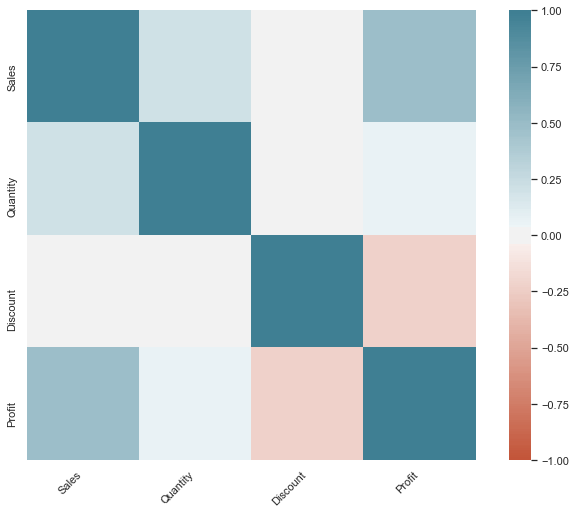

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})                  
ax=sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [12]:
print(df2['Sales'].describe())

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


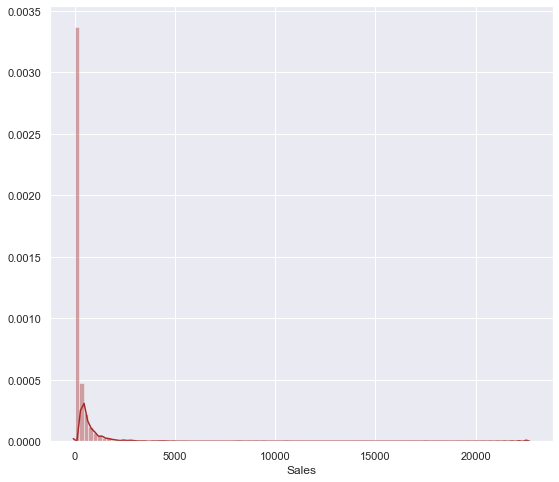

In [13]:
plt.figure(figsize=(9,8))                                
sns.distplot(df2['Sales'],bins=100,color='brown')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002303EF87388>,
      dtype=object)

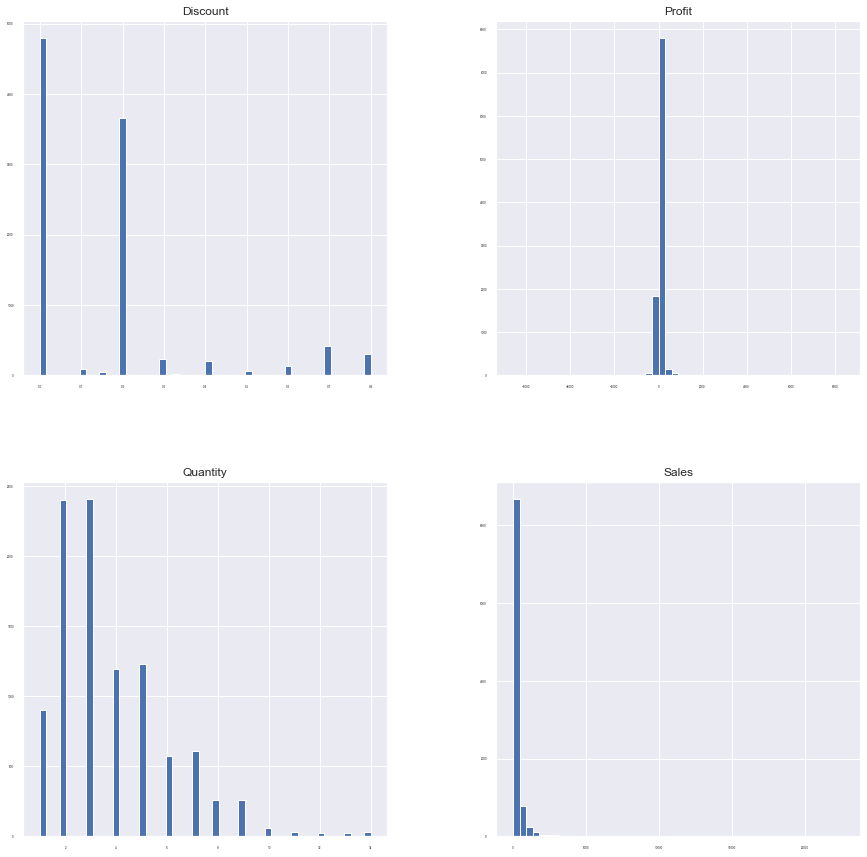

In [14]:
numerical_data.hist(figsize=(15,15),bins=50,xlabelsize=3,ylabelsize=3)

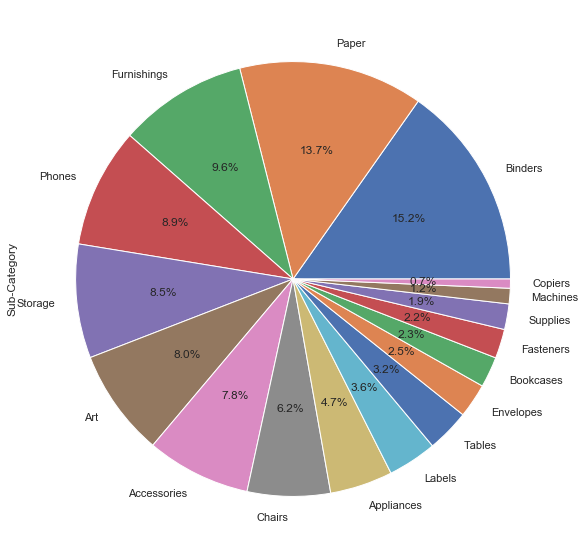

In [15]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

Text(0.5, 1, 'sales per category with its subcategory')

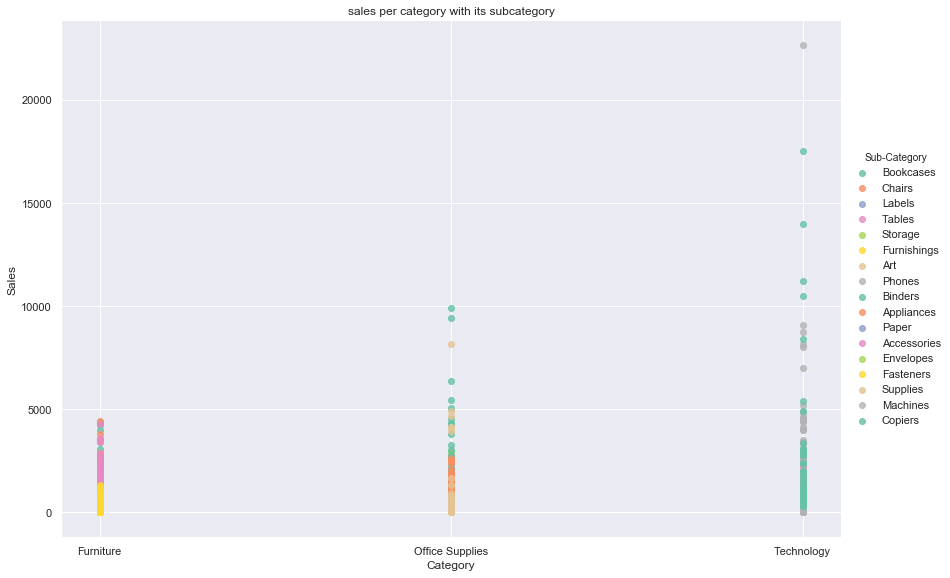

In [16]:
sns.lmplot(x='Category',y='Sales',data=df2,fit_reg=False,hue='Sub-Category',legend=True ,palette="Set2",height=8,aspect=15/10)
plt.title("sales per category with its subcategory")

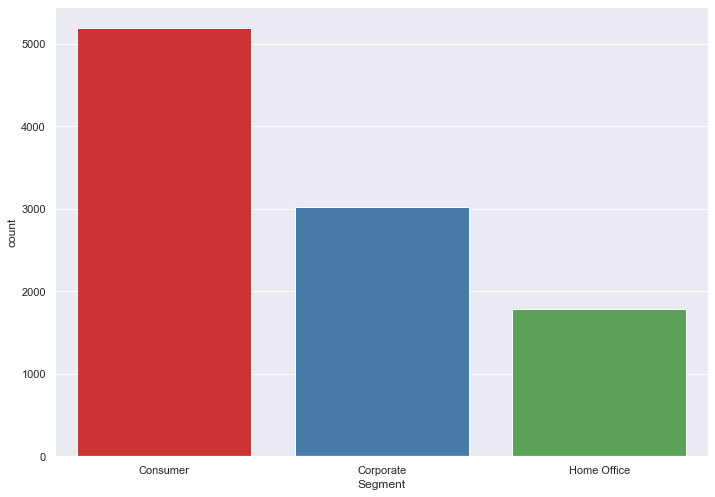

In [17]:
sns.set_style("darkgrid")
sns.countplot(x='Segment',data=df2,palette="Set1")

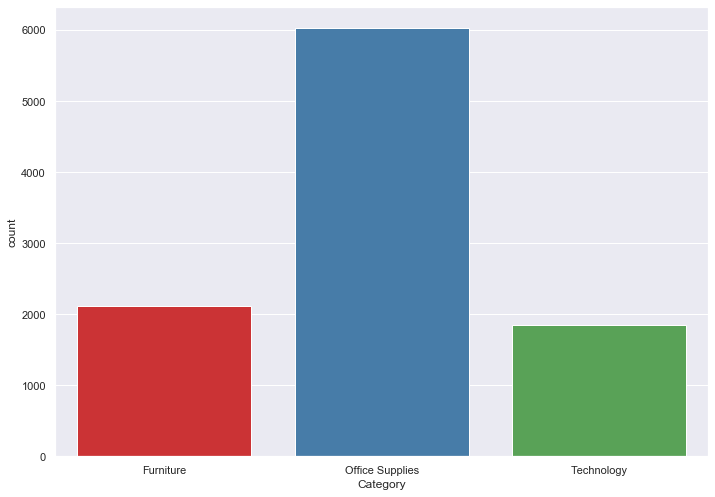

In [18]:
sns.set_style("darkgrid")
sns.countplot(x='Category',data=df2,palette="Set1")

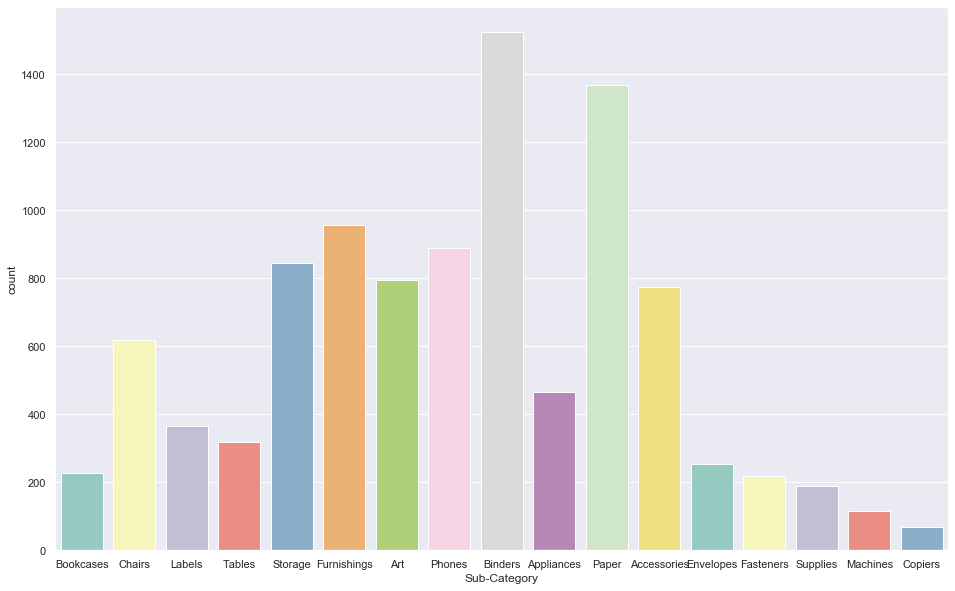

In [19]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='Sub-Category',data=df2,palette='Set3')

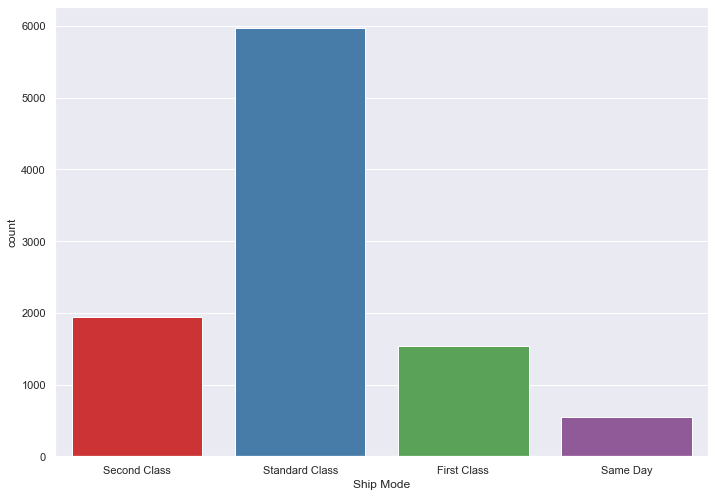

In [20]:
sns.set_style("darkgrid")
sns.countplot(x='Ship Mode',data=df2,palette="Set1")

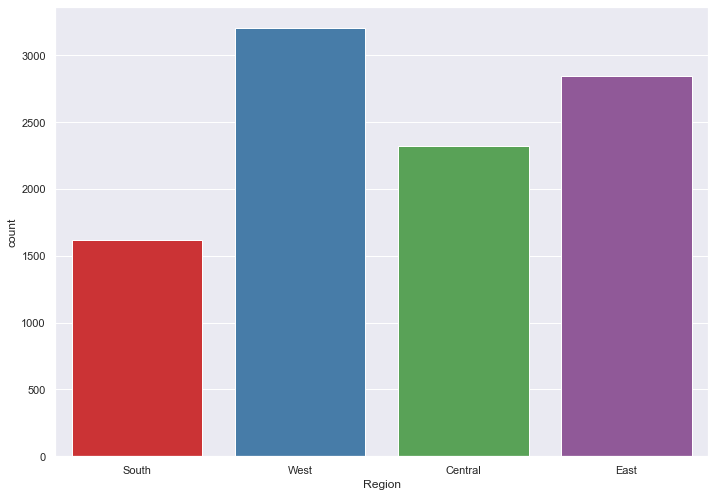

In [21]:
sns.set_style("darkgrid")
sns.countplot(x="Region",data=df2,palette="Set1")

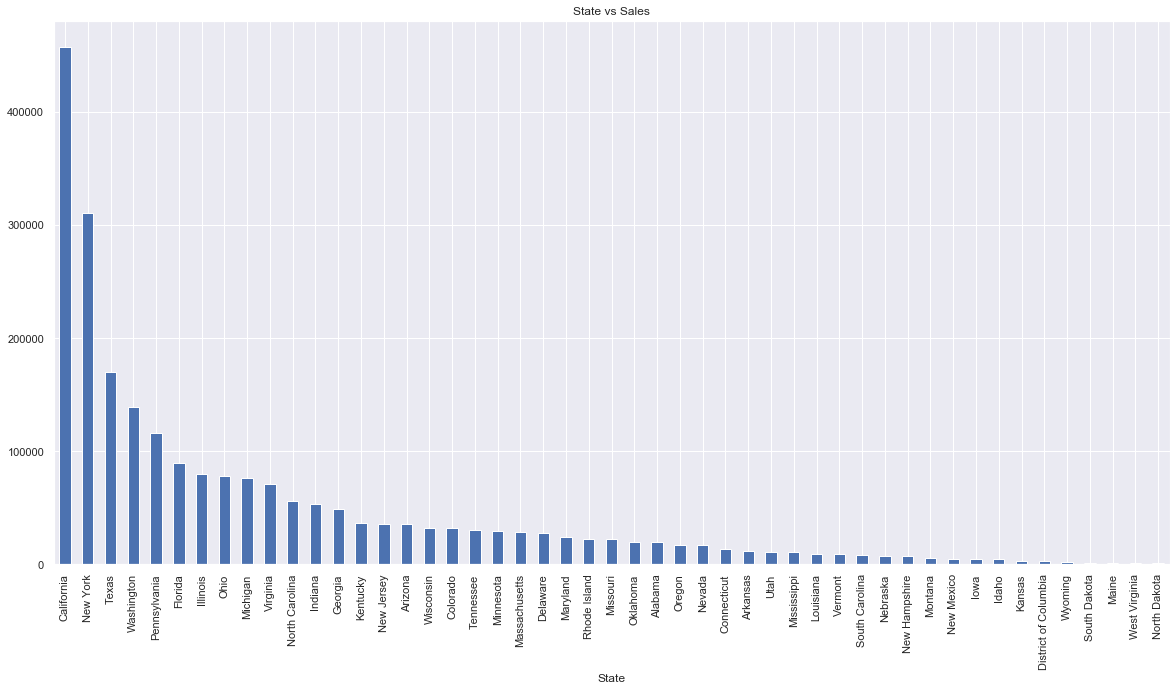

In [22]:
statewise=df2.groupby(['State'])['Sales'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title('State vs Sales')
statewise.plot.bar()


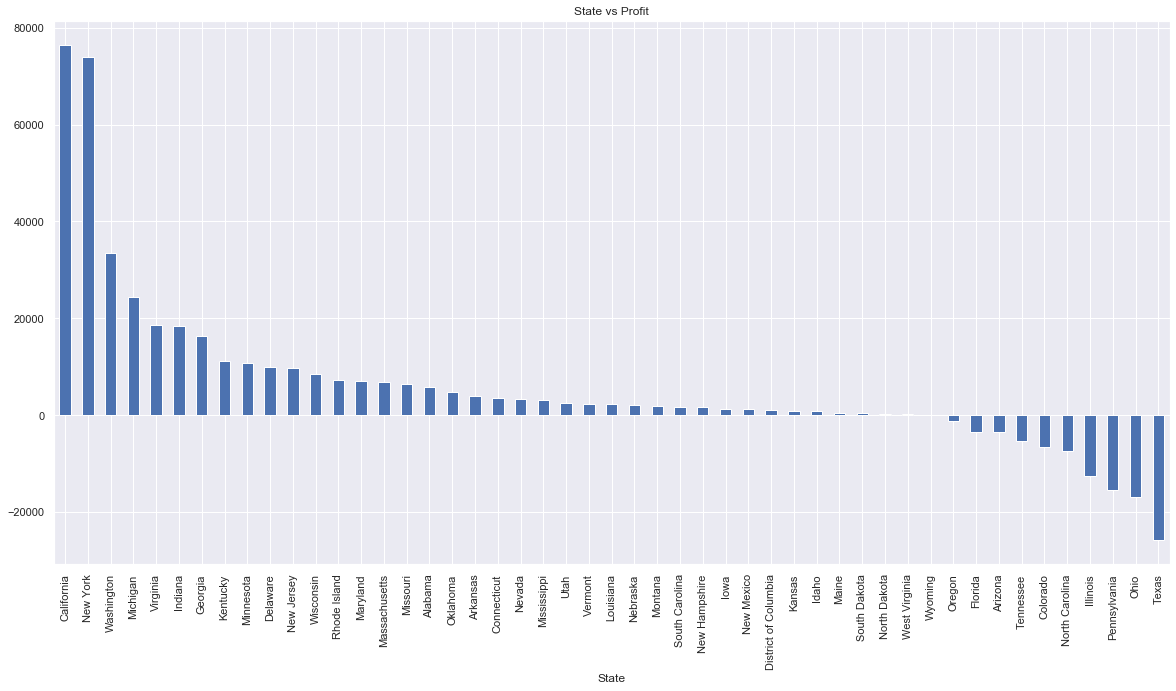

In [23]:
statewise=df2.groupby(['State'])['Profit'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title("State vs Profit")
statewise.plot.bar()

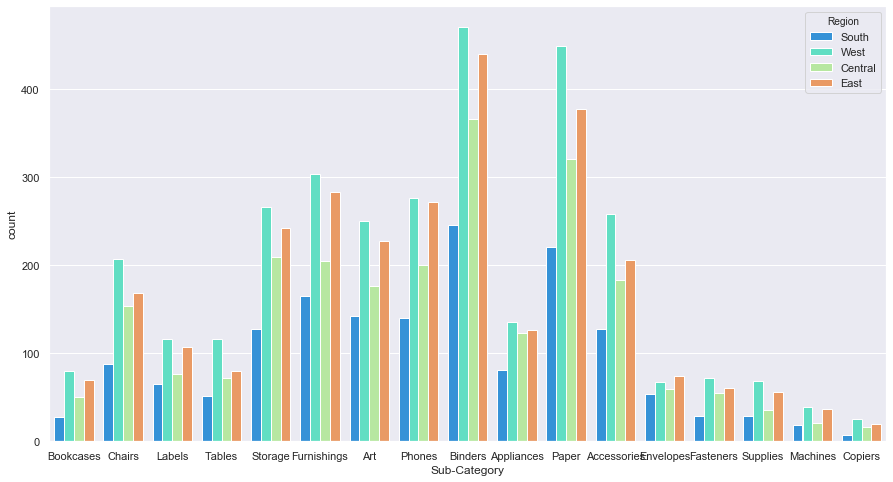

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df,palette="rainbow")
plt.show()